Install required libraries.



In [19]:
# save
import json
import os

path_data_file = "data/v4"

# Save global_embeddings to a JSON file
def save_json(data, filename):
    os.makedirs(path_data_file, exist_ok=True)
    with open(path_data_file + filename, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

#load
def load_json(filename):
    with open(path_data_file + filename, "r", encoding="utf-8") as f:
        return json.load(f)

In [29]:
text = load_json("/docs_texts.json")

os.makedirs(path_data_file, exist_ok=True)
with open(path_data_file + "/data.txt", "w", encoding="utf-8") as f:
    json.dump("\n".join(text), f, ensure_ascii=False, indent=4)

In [20]:
import locale
def getpreferredencoding(do_setlocale = True):
  return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [25]:
import matplotlib.pyplot as plt
import tiktoken
from bs4 import BeautifulSoup as Soup
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader

## Helper Fuction to count the number of Tokensin each text
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens
#
# LCEL docs
url = "https://football360.ir/"
loader = RecursiveUrlLoader(
    url=url, max_depth=2, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()

# # LCEL w/ PydanticOutputParser (outside the primary LCEL docs)
# url = "https://react.dev/community"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs_pydantic = loader.load()

# # LCEL w/ Self Query (outside the primary LCEL docs)
# url = "https://react.dev/learn"
# loader = RecursiveUrlLoader(
#     url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
# )
# docs_sq = loader.load()

# # Doc texts
# docs.extend([*docs_pydantic, *docs_sq])
docs_texts = [d.page_content for d in docs]

In [26]:
len(docs_texts)

35

In [27]:
import json

# Convert docs to a JSON-serializable format
docs_data = [
    {
        "page_content": doc.page_content,
        "metadata": doc.metadata  # Assuming `metadata` is a dictionary or JSON-serializable
    }
    for doc in docs
]

# Save to a JSON file
save_json(docs_data,"/docs.json")
save_json(docs_texts,"/docs_texts.json")


# ----------------------------------------------
# from langchain.schema import Document

# # Load from the JSON file
# docs_data = load_json("/docs.json")

# # Reconstruct the docs list (convert dictionaries back to Document objects)
# docs = [Document(page_content=doc["page_content"], metadata=doc["metadata"]) for doc in docs_data]

# # Example: Accessing content from loaded docs
# print(docs[0].page_content)


63221


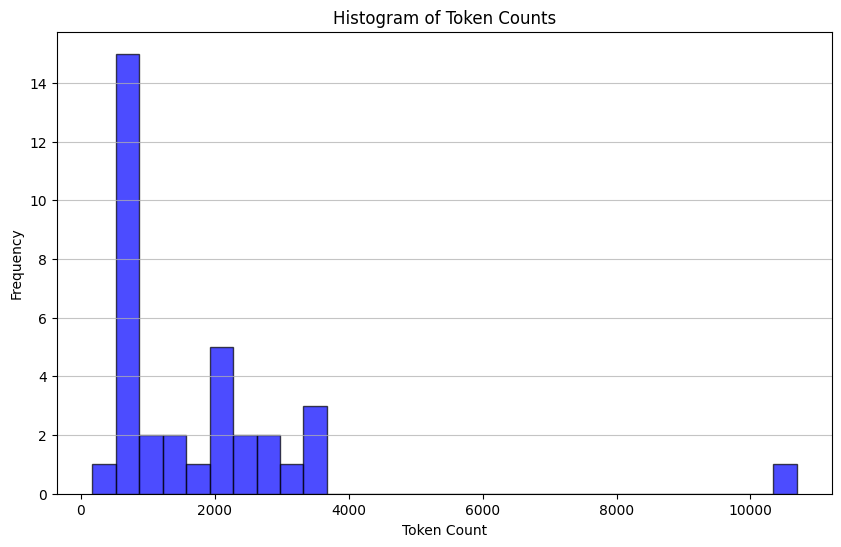

In [28]:
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

total_count = sum(counts)
print(total_count)
# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()